In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style('ticks')

In [4]:
df = pd.read_csv('daten.csv')

df.replace(to_replace='n.d.', value=np.NaN, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Date'] = df['Date'].dt.date
# df['Sample ID'] = df['Sample ID'] + ' ' + df['Date']

elements = ['O2', 'Ca', 'Mg', 'Na', 'K', 'Sr', 'Li', 'Mn', 'Cl', 'SO4', 'NO3', 'F', 'Br', 'PO4', 'NH4']

df[elements].astype(np.float64)
df['Sample ID'] = pd.Categorical(df['Sample ID'], ["W1", "W2", "W3", "W4", "W5", "W7/8", "W13", "W14"])

df.sort_values(by='Sample ID', inplace=True)

df.head()

Sample ID        Date  Depth  EC25    pH   TpH   Eh    O2     Ca    Mg  \
0         W1  2016-08-18    0.1   560  6.90  18.3  NaN   NaN   68.7  19.6   
5         W1  2017-04-26    0.1   640  7.01   9.5  183   6.3   74.4  22.4   
11        W1  2017-06-28    0.1   438  6.95  15.7  NaN   NaN   60.8  17.7   
6         W3  2017-04-26    0.1   747  7.64   8.7  NaN  8.83   96.7  23.5   
7         W3  2017-04-26    0.7   763  7.62   8.4  NaN   7.8  103.0  24.7   

    ...     NO2    NH4   TDS   pCO2  log pCO2 Si_calcite  Si_aragonite  \
0   ...     NaN  16.40  0.48  28184     -1.55      -0.42         -0.57   
5   ...     2.5   0.04  0.43   9550     -2.02      -0.76         -0.92   
11  ...    12.2   0.30  0.37  13490     -1.87      -0.72         -0.87   
6   ...     3.4   0.03  0.52   2692     -2.57       0.04         -0.12   
7   ...       4   0.06  0.56   3090     -2.51       0.07         -0.08   

    Saturation_calcite  Saturation_aragonite An/Kat  
0                 0.38                  0.27   1.00  
5                 0.17                  0.12   1.00  
11                0.19                  0.13   0.99  
6                 1.10                  0.76   1.00  
7                 1.17                  0.83   1.01  

[5 rows x 33 columns]

# Waterchemistry overview

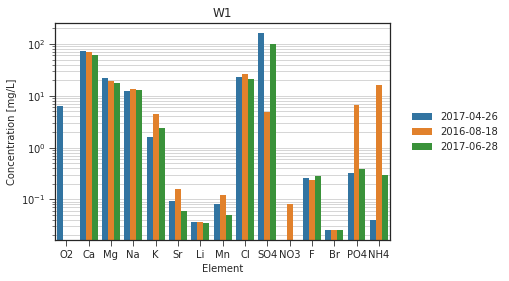

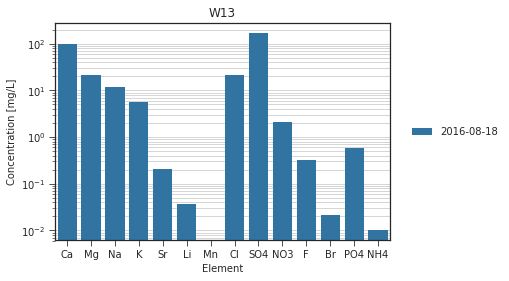

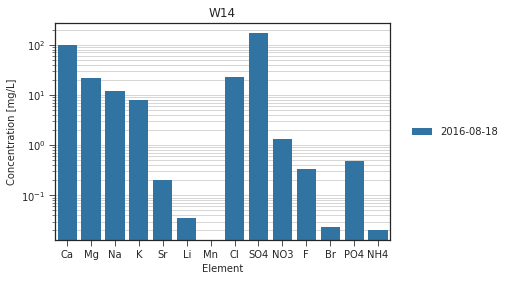

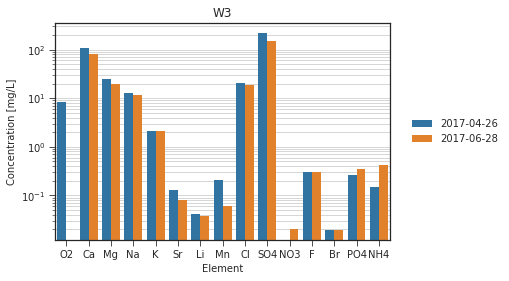

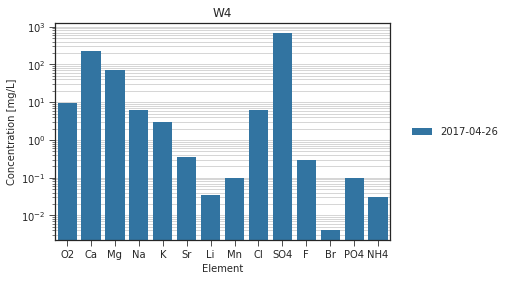

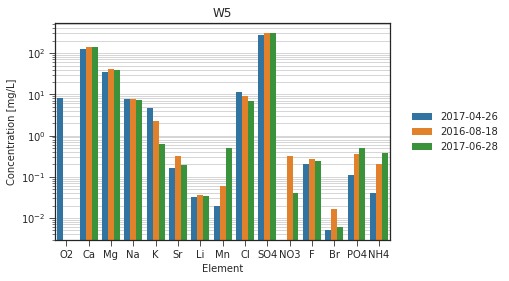

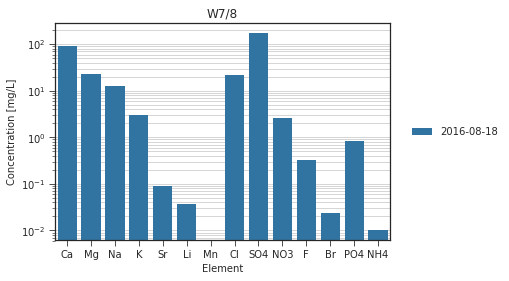

In [5]:
df_long = pd.melt(df, id_vars=["Sample ID", "Date"], value_vars=elements, value_name="vals")

df_long.dropna(inplace=True)
df_long['vals'] = df_long.vals.astype(np.float64)

group = df_long.groupby(["Sample ID"])

for name, w in group:
    plt.figure()
    plt.title(name)
    
    ax = sns.barplot(data=w, x='variable', y="vals", hue="Date", ci=None)

    ax.ylim=[1, 1000]
    plt.yscale('log', nonposy='clip')
    ax.set(xlabel='Element', ylabel='Concentration [mg/L]')

    ax.grid('on', axis='y', which='both')
    ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

    plt.show()
#     name = name.replace('/', '_')
#     plt.savefig(f'plots/elements/{name}/elements_{name}_log.png', dpi=600, bbox_inches='tight')
#     plt.savefig(f'plots/elements/{name}/elements_{name}_log.svg', dpi=600, bbox_inches='tight')
    plt.clf(), plt.close()


# Einzelplots

## 1. pCO2

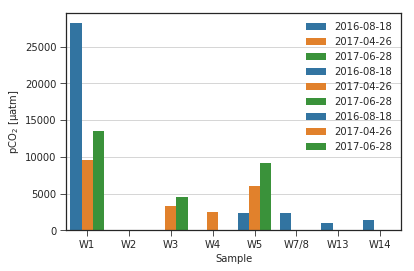

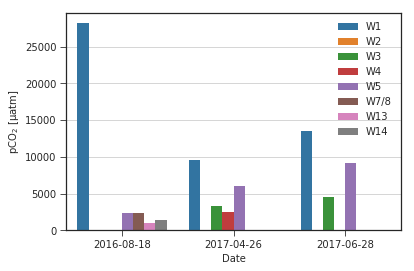

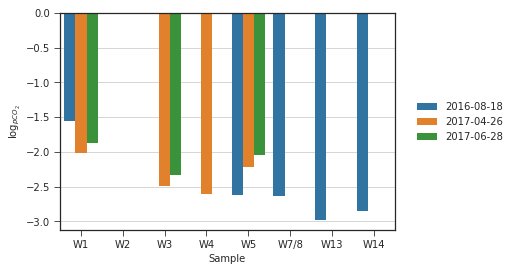

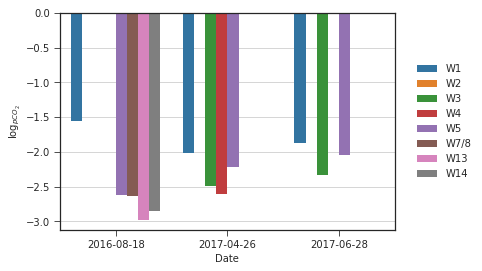

(None, None)

In [8]:
# ABS
# By sample
sns.barplot(data=df, x="Sample ID", y="pCO2", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(loc="upper right")

plt.xlabel('Sample')
plt.ylabel(u'pCO$_{2}$ [µatm]')

plt.show()
# plt.savefig('plots/co2/pCO2_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/co2/pCO2_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="pCO2", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(loc="upper right")

plt.xlabel('Date')
plt.ylabel(u'pCO$_{2}$ [µatm]')

plt.show()
# plt.savefig('plots/co2/pCO2_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/co2/pCO2_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()


# LOG
# By sample
sns.barplot(data=df, x="Sample ID", y="log pCO2", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Sample')
plt.ylabel(u'log$_{pCO_{2}}$')

plt.show()
# plt.savefig('plots/co2/log_pCO2_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/co2/log_pCO2_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="log pCO2", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Date')
plt.ylabel(u'log$_{pCO_{2}}$')

plt.show()
# plt.savefig('plots/co2/log_pCO2_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/co2/log_pCO2_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()


## 2. Calcite Saturation

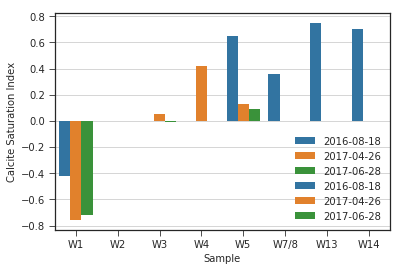

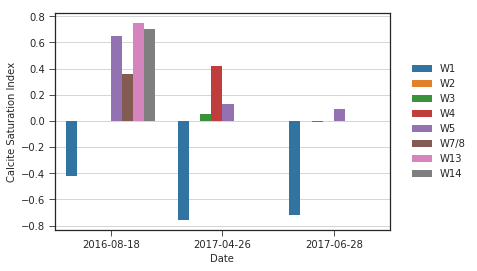

(None, None)

In [10]:
# By sample
sns.barplot(data=df, x="Sample ID", y="Si_calcite", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(loc="best")

plt.xlabel('Sample')
plt.ylabel(u'Calcite Saturation Index')

plt.show()
# plt.savefig('plots/calcite_saturation/Si_calcite_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/calcite_saturation/Si_calcite_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="Si_calcite", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Date')
plt.ylabel(u'Calcite Saturation Index')

plt.show()
# plt.savefig('plots/calcite_saturation/Si_calcite_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/calcite_saturation/Si_calcite_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()

## 3. Aragonite Saturation

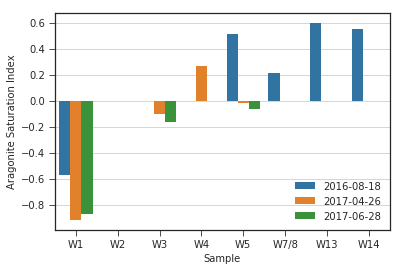

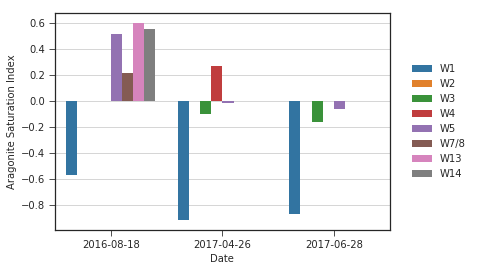

(None, None)

In [11]:
# By sample
sns.barplot(data=df, x="Sample ID", y="Si_aragonite", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(loc="best")

plt.xlabel('Sample')
plt.ylabel(u'Aragonite Saturation Index')

plt.show()
# plt.savefig('plots/aragonite_saturation/Si_aragonite_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/aragonite_saturation/Si_aragonite_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="Si_aragonite", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Date')
plt.ylabel(u'Aragonite Saturation Index')

plt.show()
# plt.savefig('plots/aragonite_saturation/Si_aragonite_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/aragonite_saturation/Si_aragonite_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()

## 4. Conductivity

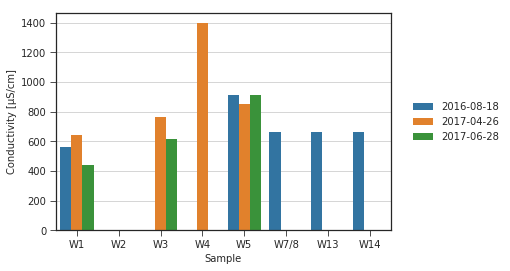

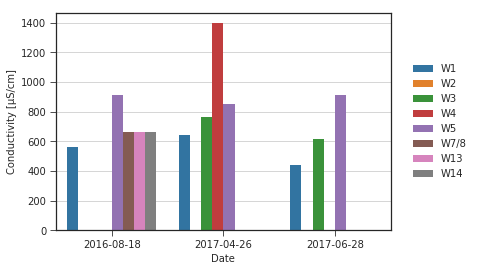

(None, None)

In [12]:
# By sample
sns.barplot(data=df, x="Sample ID", y="EC25", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Sample')
plt.ylabel(u'Conductivity [µS/cm]')

plt.show()
# plt.savefig('plots/conductivity/EC25_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/conductivity/EC25_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="EC25", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Date')
plt.ylabel(u'Conductivity [µS/cm]')

plt.show()
# plt.savefig('plots/conductivity/EC25_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/conductivity/EC25_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()

## 5. pH

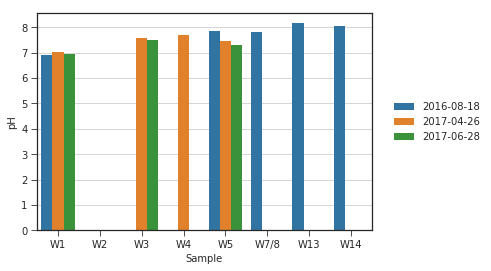

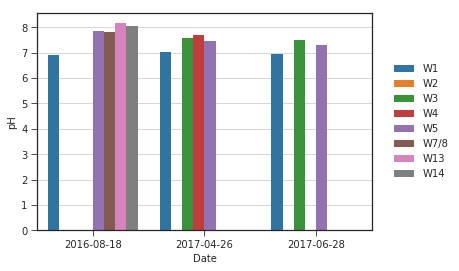

(None, None)

In [13]:
# By sample
sns.barplot(data=df, x="Sample ID", y="pH", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Sample')
plt.ylabel(u'pH')

plt.show()
# plt.savefig('plots/pH/pH_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/pH/pH_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="pH", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Date')
plt.ylabel(u'pH')

plt.show()
# plt.savefig('plots/pH/pH_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/pH/pH_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()

## 6. TpH

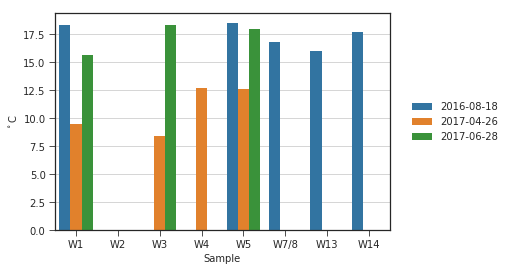

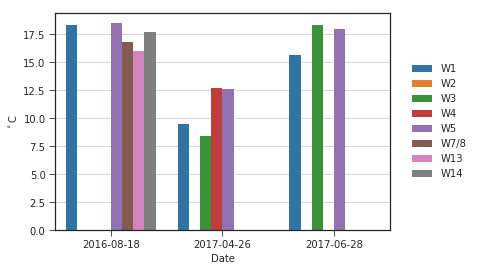

(None, None)

In [14]:
# By sample
sns.barplot(data=df, x="Sample ID", y="TpH", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Sample')
plt.ylabel(u'$^\circ$C')

plt.show()
# plt.savefig('plots/TpH/TpH_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/TpH/TpH_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="TpH", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Date')
plt.ylabel(u'$^\circ$C')

plt.show()
# plt.savefig('plots/TpH/TpH_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/TpH/TpH_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()

## 7. Total alkalinity

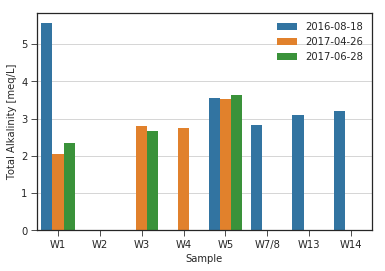

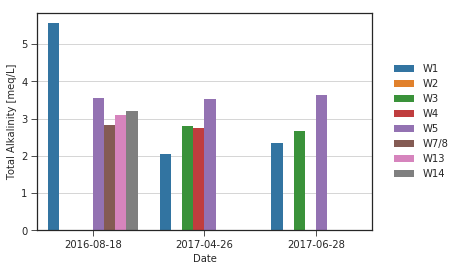

(None, None)

In [15]:
# By sample
sns.barplot(data=df, x="Sample ID", y="TA", hue="Date", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(loc="upper right")

plt.xlabel('Sample')
plt.ylabel(u'Total Alkalinity [meq/L]')

plt.show()
# plt.savefig('plots/TA/TA_by_sample.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/TA/TA_by_sample.svg', bbox_inches='tight')
plt.clf(), plt.close()

# By date
sns.barplot(data=df, x="Date", y="TA", hue="Sample ID", ci=None)
plt.grid('on', axis='y', which='major')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

plt.xlabel('Date')
plt.ylabel(u'Total Alkalinity [meq/L]')

plt.show()
# plt.savefig('plots/TA/TA_by_date.png', dpi=600, bbox_inches='tight')
# plt.savefig('plots/TA/TA_by_date.svg', bbox_inches='tight')
plt.clf(), plt.close()